<a href="https://colab.research.google.com/github/thenameisAnurag/SCOA/blob/main/SCOA_4_ACO_and_TSP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Best path length = 5.10
Iteration 10: Best path length = 4.30
Iteration 20: Best path length = 4.07
Iteration 30: Best path length = 3.99
Iteration 40: Best path length = 3.99
Iteration 50: Best path length = 3.99
Iteration 60: Best path length = 3.99
Iteration 70: Best path length = 3.99
Iteration 80: Best path length = 3.97
Iteration 90: Best path length = 3.97


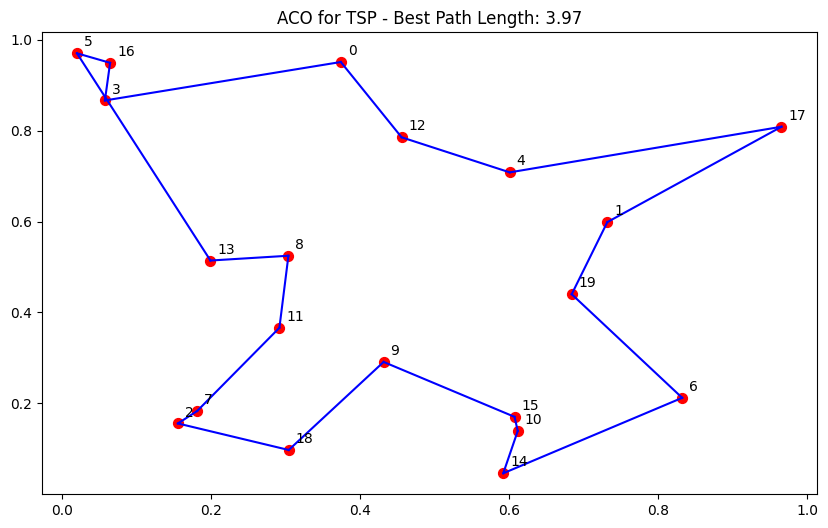


Optimization complete!
Best path: [4, 12, 0, 3, 16, 5, 13, 8, 11, 7, 2, 18, 9, 15, 10, 14, 6, 19, 1, 17]
Best path length: 3.97


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class AntColonyOptimization:
    def __init__(self, distances, n_ants, n_iterations, alpha=1, beta=2, rho=0.5, Q=100):
        self.distances = distances
        self.n_cities = len(distances)
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # Pheromone importance
        self.beta = beta  # Distance importance
        self.rho = rho  # Pheromone evaporation rate
        self.Q = Q  # Pheromone deposit factor
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.best_path = None
        self.best_path_length = float('inf')

    def run(self):
        for iteration in range(self.n_iterations):
            paths = self.construct_paths()
            self.update_pheromone(paths)
            self.update_best_path(paths)
            if iteration % 10 == 0:
                print(f"Iteration {iteration}: Best path length = {self.best_path_length:.2f}")
        return self.best_path, self.best_path_length

    def construct_paths(self):
        paths = []
        for ant in range(self.n_ants):
            path = self.construct_path_for_ant()
            paths.append(path)
        return paths

    def construct_path_for_ant(self):
        unvisited = list(range(self.n_cities))
        start = np.random.choice(unvisited)
        path = [start]
        unvisited.remove(start)
        while unvisited:
            current = path[-1]
            probabilities = self.calculate_probabilities(current, unvisited)
            next_city = np.random.choice(unvisited, p=probabilities)
            path.append(next_city)
            unvisited.remove(next_city)
        return path

    def calculate_probabilities(self, current, unvisited):
        pheromone = np.array([self.pheromone[current][j] for j in unvisited])
        distance = np.array([self.distances[current][j] for j in unvisited])
        attractiveness = pheromone ** self.alpha * ((1.0 / distance) ** self.beta)
        probabilities = attractiveness / np.sum(attractiveness)
        return probabilities

    def update_pheromone(self, paths):
        self.pheromone *= (1 - self.rho)
        for path in paths:
            path_length = self.calculate_path_length(path)
            for i in range(self.n_cities):
                from_city, to_city = path[i], path[(i + 1) % self.n_cities]
                self.pheromone[from_city][to_city] += self.Q / path_length
                self.pheromone[to_city][from_city] += self.Q / path_length

    def update_best_path(self, paths):
        for path in paths:
            path_length = self.calculate_path_length(path)
            if path_length < self.best_path_length:
                self.best_path = path
                self.best_path_length = path_length

    def calculate_path_length(self, path):
        return sum(self.distances[path[i]][path[(i + 1) % self.n_cities]] for i in range(self.n_cities))

# Generate a random TSP instance
n_cities = 20
np.random.seed(42)
cities = np.random.rand(n_cities, 2)
distances = np.sqrt(((cities[:, np.newaxis, :] - cities[np.newaxis, :, :]) ** 2).sum(axis=2))

# Run ACO
aco = AntColonyOptimization(distances, n_ants=20, n_iterations=100)
best_path, best_path_length = aco.run()

# Visualize the result
plt.figure(figsize=(10, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='red', s=50)
for i in range(n_cities):
    plt.annotate(str(i), (cities[i, 0], cities[i, 1]), xytext=(5, 5), textcoords='offset points')
for i in range(len(best_path)):
    j = (i + 1) % len(best_path)
    plt.plot([cities[best_path[i], 0], cities[best_path[j], 0]],
             [cities[best_path[i], 1], cities[best_path[j], 1]], 'b-')
plt.title(f"ACO for TSP - Best Path Length: {best_path_length:.2f}")
plt.show()

print("\nOptimization complete!")
print(f"Best path: {best_path}")
print(f"Best path length: {best_path_length:.2f}")
